In [196]:
import pandas as pd
import numpy as np
from pdb import set_trace as st
from copy import copy
import re
import seaborn as sns
import fastcluster
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from scipy import stats
import copy

from matplotlib.patches import Patch
from sklearn.manifold import TSNE #need scikit-learn installed
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import scipy
from matplotlib.patches import Patch
import matplotlib.colors as mcolors


In [ ]:
#Dropping any NA groups (if NA shows up after second underscore in index)
Data_Log2 = Data_Log2[~Data_Log2.index.str.contains('NA')]
Data_Log2

TypeError: bad operand type for unary ~: 'float'

In [214]:
#Data Organizing, Normalization, Transformation

#1. Loading Data
proteomics_file = 'proteomics_random.xlsx'
Data = pd.read_excel(proteomics_file)

clinical_file = 'covars_random.xlsx'
clinical = pd.read_excel(clinical_file)

#2. Dropping Unwanted Columns (PG.ProteinAccessions, PG.ProteinDescriptions)
Data = Data.drop(columns=['PG.ProteinAccessions', 'PG.ProteinDescriptions'])

#3. Set PG.Genes as index
Data = Data.set_index('PG.Genes')
Data.index.name = ''
Data.columns.name = ''

#4. Dropping NaNs (all columns)
Data = Data.dropna()

#5. Normalize + Transform
Data_RowNorm = Data.div(Data.mean(axis=1), axis=0)
Data_ColNorm = Data_RowNorm.div(Data_RowNorm.mean(axis=1), axis=0)
Data_Log2 = np.log2(Data_ColNorm)

#looping over columns and deleting any columns that contain "NA"
for i in Data_Log2.columns:
    if 'NA' in i:
        Data_Log2 = Data_Log2.drop(columns=[i])


#6. Transpose Data
Data_Log2_T = Data_Log2.transpose()


#7. Adding column for PD, CTRL, and T2D groups 
group = []
for i in Data_Log2_T.index:
    group.append(i.split('_')[2])
Data_Log2_T['Group'] = group

#8. Adding a new sample id column (whatever before hte first underscore)
sample_id = []
for i in Data_Log2_T.index:
    sample_id.append(i.split('_')[0])
Data_Log2_T['Sample_ID'] = sample_id
display(Data_Log2_T)


/Applications/anaconda3/envs/ns4300/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Applications/anaconda3/envs/ns4300/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,HDLBP,DMD,IGLV4-69,IGKV2D-24;IGKV2-24,TXNRD1,CPB2,HMOX2,COL1A2,PTPRJ,ERGIC2,...,HYDIN,PPM1L,COL5A1-AS1,KRT26,TUSC5,SCAI,ABCD2,PPP1R1B,Group,Sample_ID
,,,,,,,,,,,,,,,,,,,,,
rand492_Fat_PD,0.005966,0.032924,0.036547,0.033112,0.001486,0.038787,0.017293,0.001184,0.053169,-0.070460,...,0.076307,-0.001739,-0.018986,0.076221,0.011756,0.046993,-0.031581,0.029143,PD,rand492
rand3807_Fat_CTRL,-0.078165,-0.057932,-0.122664,-0.177975,-0.163644,-0.249451,-0.138906,-0.086228,-0.053049,-0.149319,...,-0.153146,-0.069314,-0.156895,-0.066230,-0.078417,-0.108707,-0.176493,-0.111679,CTRL,rand3807
rand3129_Fat_CTRL,-0.033448,-0.037806,0.006257,0.051508,0.017318,0.030552,-0.001685,-0.034657,0.068231,0.050846,...,0.030511,0.010291,0.012898,0.004289,-0.045886,-0.014100,0.092567,-0.004795,CTRL,rand3129
rand553_Fat_PD,-0.178978,-0.151473,-0.168624,-0.200884,-0.130730,-0.139728,-0.162824,-0.191876,-0.071705,-0.160791,...,-0.168791,-0.125776,-0.204399,-0.105062,-0.192993,-0.153671,-0.131246,-0.133901,PD,rand553
rand1780_Fat_CTRL,0.093029,0.086179,0.087515,0.119925,0.093612,0.218983,0.080940,0.122659,0.135386,0.091731,...,0.092967,0.141773,0.152466,0.073728,0.076679,0.086566,0.139247,0.036036,CTRL,rand1780
rand1864_Fat_T2D,0.179245,0.190315,0.156087,0.094430,0.141592,0.025414,0.156546,0.184544,0.116693,0.160381,...,0.247186,0.112412,0.195276,0.066558,0.157691,0.169967,0.149032,0.160724,T2D,rand1864
rand1787_Fat_CTRL,-0.070727,-0.066058,-0.046198,-0.057974,-0.090320,-0.036999,-0.063615,-0.040910,-0.006850,-0.078704,...,-0.049529,-0.057548,-0.082757,-0.099002,-0.079170,-0.057617,-0.120703,-0.098582,CTRL,rand1787
rand2037_Fat_CTRL,-0.069474,-0.034598,-0.132184,-0.078683,-0.058172,-0.119571,-0.138148,-0.045143,-0.181614,-0.120935,...,-0.127824,-0.038959,-0.203081,-0.094496,-0.106650,-0.110940,-0.207132,-0.134049,CTRL,rand2037
rand4030_Fat_PD,-0.090930,-0.085123,-0.212425,-0.165770,-0.032555,-0.189866,-0.106537,-0.130568,-0.086582,-0.147219,...,-0.125810,-0.132450,-0.157715,-0.169410,-0.096924,-0.116637,-0.036156,-0.244945,PD,rand4030


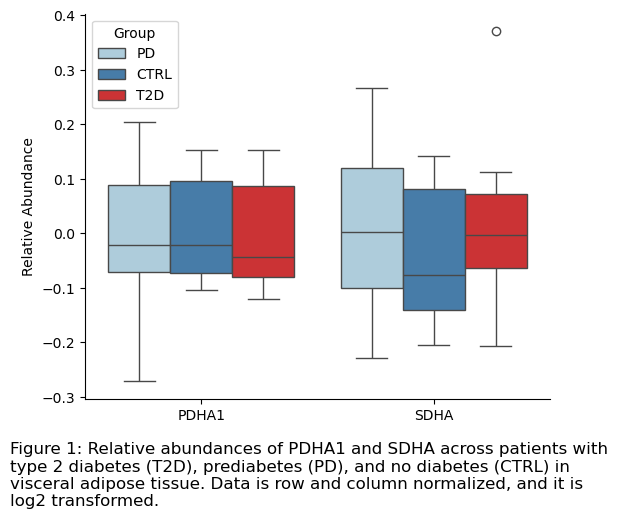

In [198]:
#Boxplot - compare PDHA1 and SDHA
Data_plot = copy.copy(Data_Log2_T.loc[:,['Sample_ID','Group','PDHA1','SDHA']])
Data_plot = Data_plot[Data_plot['Group'] != 'NA']


#5. Melt the DataFrame
Data_plot_long = Data_plot.melt(id_vars=['Group','Sample_ID'],var_name='Gene',value_name='Relative Abundance')


palette = {
    "T2D": "#E41A1C",
    "CTRL": "#377EB8",
    "PD": "#A6CEE3"
}
plt.figure(figsize=(6,5))
ax = sns.boxplot(x='Gene', 
            y='Relative Abundance', 
            data=Data_plot_long, 
            hue='Group',
            palette = palette)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Remove the x-axis label
ax.set_xlabel('')

# Add a caption
caption = "Figure 1: Relative abundances of PDHA1 and SDHA across patients with type 2 diabetes (T2D), prediabetes (PD), and no diabetes (CTRL) in visceral adipose tissue. Data is row and column normalized, and it is log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')

plt.show()

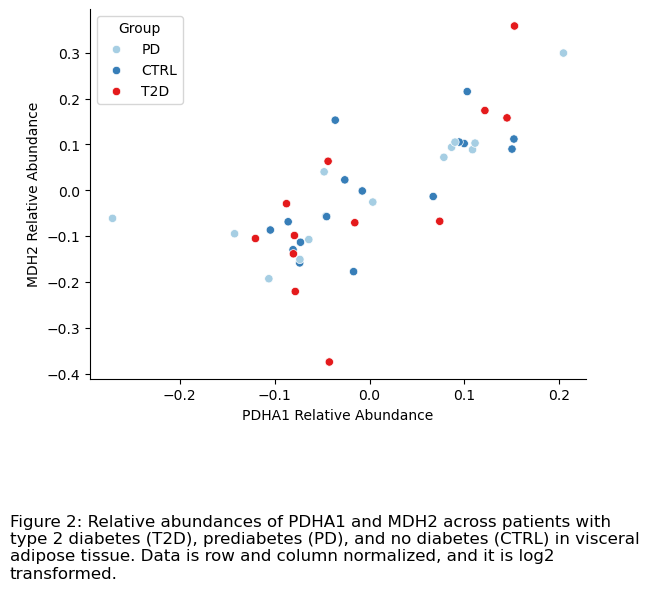

In [207]:
#Dotplot - Compare PDHA1 and CS
Data_plot = copy.copy(Data_Log2_T.loc[:,['Sample_ID','Group','PDHA1','MDH2']])
Data_plot = Data_plot[Data_plot['Group'] != 'NA']


palette = {
    "T2D": "#E41A1C",
    "CTRL": "#377EB8",
    "PD": "#A6CEE3"
}


ax = sns.scatterplot(x='PDHA1', 
            y='MDH2', 
            data=Data_plot, 
            hue='Group',
            palette = palette)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#Custom tick marks for y-axis
# yticks = [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
# ax.set_yticks(yticks)

# #Custom tick marks for x-axis
# xticks = [-0.2, 0.0, 0.2, 0.4, 0.6, 0.8]
# ax.set_xticks(xticks)

#Changing x and y axis labels
ax.set_xlabel('PDHA1 Relative Abundance')
ax.set_ylabel('MDH2 Relative Abundance')


# Add a caption
caption = "Figure 2: Relative abundances of PDHA1 and MDH2 across patients with type 2 diabetes (T2D), prediabetes (PD), and no diabetes (CTRL) in visceral adipose tissue. Data is row and column normalized, and it is log2 transformed."

plt.figtext(x=0, y=-0.3, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()

,Gender,Insulin Stimulated,T2D Status
Sample_Id,,,
rand492_Fat_PD,blue,orange,yellow
rand3807_Fat_CTRL,blue,green,purple
rand3129_Fat_CTRL,blue,green,white
rand553_Fat_PD,red,orange,cyan
rand1780_Fat_CTRL,red,orange,yellow
rand1864_Fat_T2D,red,green,cyan
rand1787_Fat_CTRL,blue,orange,yellow
rand2037_Fat_CTRL,blue,green,purple
rand4030_Fat_PD,blue,green,cyan


/var/folders/nq/1jsz191s5yb4ygg41g6qf5j00000gn/T/ipykernel_27523/4120124834.py:64: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_column_colors = combined_column_colors.fillna('white').applymap(mcolors.to_hex)  # Convert color names to hex format


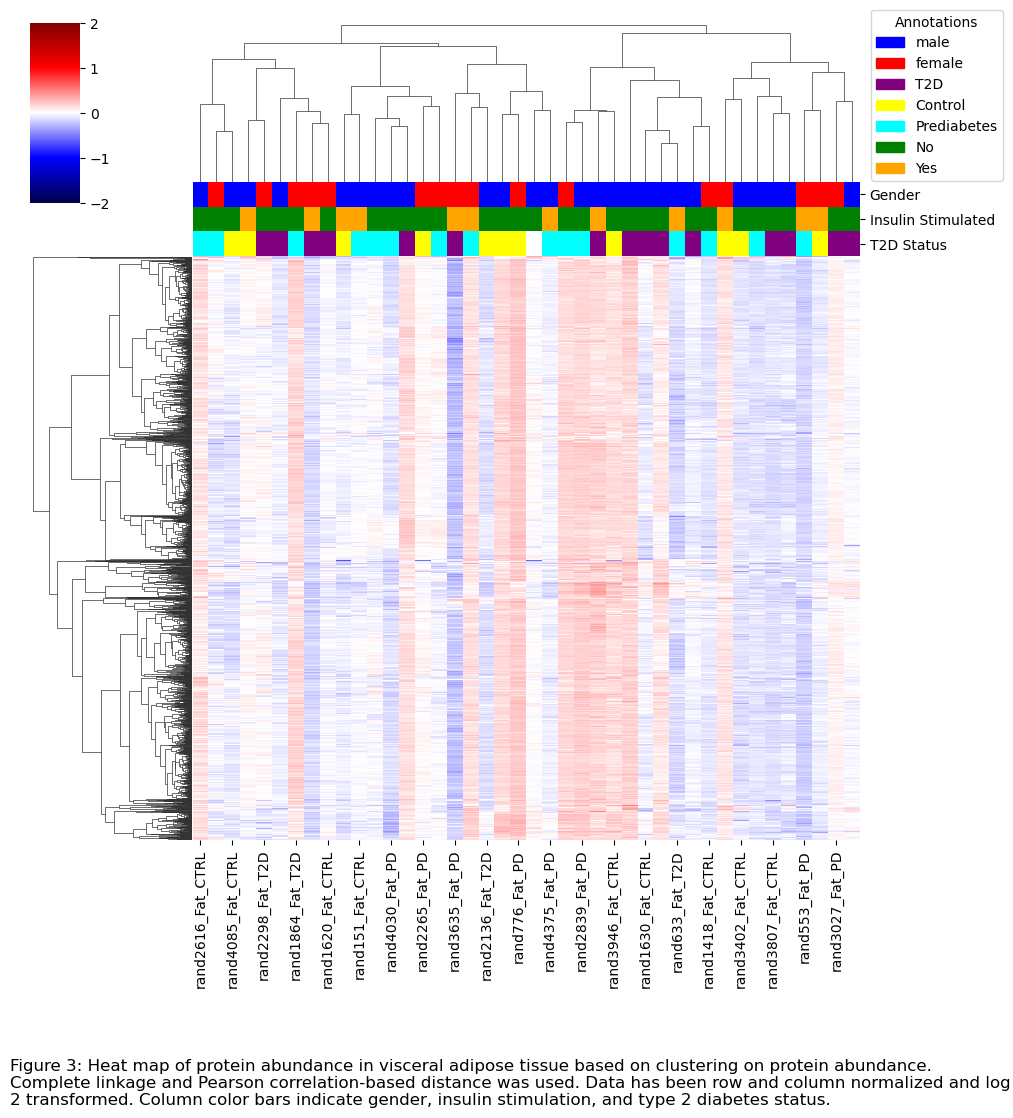

In [217]:
#Heatmap - looking at insulin, glucocorticoid, T2D status, gender, per individual
#dropping groups with NA

Data_Log2_T = Data_Log2_T[Data_Log2_T['Group'] != 'NA']
Data_Log2_TT = Data_Log2_T.transpose()
Data_Log2_TT

#make sample_id the column names
Data_Log2_TT.columns = Data_Log2_TT.iloc[-1]

#drop rows for group and sample_id
Data_Log2_TT = Data_Log2_TT.drop(['Group','Sample_ID'])
Data_Log2_TT

#creating copy of clinical
clinical_annotations = clinical.copy()


# Create color mapping dictionaries for 'Gender' and 'Insulin Stimulated'
gender_colors = {'M': 'blue', 'F': 'red'}
insulin_colors = {'NO': 'green', 'YES': 'orange'}
#glucocorticoid_colors = {'NO': 'pink', 'YES': 'brown'}
t2d_colors = {'T2D': 'yellow', 'CTRL': 'purple', 'PD': 'cyan'}


# Map the colors to the columns in Data_Log2
gender_column_colors = clinical_annotations.set_index('id')['sex'].map(gender_colors).reindex(Data_Log2_TT.columns).fillna('white')
insulin_stimulated_column_colors = clinical_annotations.set_index('id')['insulin'].map(insulin_colors).reindex(Data_Log2_TT.columns).fillna('white')
t2d_column_colors = clinical_annotations.set_index('id')['pheno_3c'].map(t2d_colors).reindex(Data_Log2_TT.columns).fillna('white')


#individual_column_colors = clinical_annotations.set_index('id')['id'].map(individual_colors)
#glucocorticoid_column_colors = clinical_annotations.set_index('id')['glucocorticoids'].map(glucocorticoid_colors)



# Ensuring order of colors matches the order of columns in Data_Log2 (based on id in the color columns and Sample_Id in Data_Log2)
gender_column_colors = gender_column_colors.reindex(Data_Log2_TT.columns)
insulin_colors = insulin_stimulated_column_colors.reindex(Data_Log2_TT.columns)
t2d_column_colors = t2d_column_colors.reindex(Data_Log2_TT.columns)




#glucocorticoid_column_colors = glucocorticoid_column_colors.reindex(Data_Log2_T.columns)
#individual_column_colors = individual_column_colors.reindex(Data_Log2_T.columns)
# Reorders the gender_column_colors series to match the order of the columns in Data_Log2


# Combine the color mappings into a DataFrame
combined_column_colors = pd.DataFrame({
    'Gender': gender_column_colors,
    'Insulin Stimulated': insulin_stimulated_column_colors,
    'T2D Status': t2d_column_colors,
    #'Individual': individual_column_colors,
    #'Glucocorticoid': glucocorticoid_column_colors
})

combined_column_colors['Sample_Id'] = Data_Log2_T.index
combined_column_colors = combined_column_colors.set_index('Sample_Id')
display(combined_column_colors)

# Fill NaN values with a default color (e.g., white) and ensure colors are in hexadecimal format
combined_column_colors = combined_column_colors.fillna('white').applymap(mcolors.to_hex)  # Convert color names to hex format



# Make the heat map
min_color = -2
max_color = 2
hm = sns.clustermap(data=Data_Log2,
                    method='complete',
                    metric='correlation',
                    yticklabels=False,
                    vmin=min_color,
                    vmax=max_color,
                    cmap='seismic',
                    col_colors=combined_column_colors)

# Create custom legend handles
legend_handles = [
    Patch(facecolor='blue', edgecolor='blue', label='male'),
    Patch(facecolor='red', edgecolor='red', label='female'),
    Patch(facecolor='purple', edgecolor='purple', label='T2D'),
    Patch(facecolor='yellow', edgecolor='yellow', label='Control'),
    Patch(facecolor='cyan', edgecolor='cyan', label='Prediabetes'),
    Patch(facecolor='green', edgecolor='green', label='No'),
    Patch(facecolor='orange', edgecolor='orange', label='Yes'),
    ]

# Add the legend to the plot
plt.legend(handles=legend_handles, title='Annotations', bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
caption = "Figure 3: Heat map of protein abundance in visceral adipose tissue based on clustering on protein abundance. Complete linkage and Pearson correlation-based distance was used. Data has been row and column normalized and log 2 transformed. Column color bars indicate gender, insulin stimulation, and type 2 diabetes status."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')


plt.show()

In [216]:
combined_column_colors

,Gender,Insulin Stimulated,T2D Status
Sample_Id,,,
rand492_Fat_PD,#0000ff,#ffa500,#ffff00
rand3807_Fat_CTRL,#0000ff,#008000,#800080
rand3129_Fat_CTRL,#0000ff,#008000,#ffffff
rand553_Fat_PD,#ff0000,#ffa500,#00ffff
rand1780_Fat_CTRL,#ff0000,#ffa500,#ffff00
rand1864_Fat_T2D,#ff0000,#008000,#00ffff
rand1787_Fat_CTRL,#0000ff,#ffa500,#ffff00
rand2037_Fat_CTRL,#0000ff,#008000,#800080
rand4030_Fat_PD,#0000ff,#008000,#00ffff


In [209]:
#Volcano Plot - t-test (PD vs CTRL, CTRL vs T2D, T2D vs prediabetes) ----> do enrichment analysis to see which pathways
# Three different volcano plots :(

pd_df = Data_Log2_T[Data_Log2_T['Group'] == 'PD'].transpose().drop(['Group', 'Sample_ID'])
ctrl_df = Data_Log2_T[Data_Log2_T['Group'] == 'CTRL'].transpose().drop(['Group', 'Sample_ID'])
t2d_df = Data_Log2_T[Data_Log2_T['Group'] == 'T2D'].transpose().drop(['Group', 'Sample_ID'])


row_means_pd = pd_df.mean(axis=1)
row_means_pd_df = pd.DataFrame({'Samples_Mean': row_means_pd})

row_means_ctrl = ctrl_df.mean(axis=1)
row_means_ctrl_df = pd.DataFrame({'Samples_Mean': row_means_ctrl})

row_means_t2d = t2d_df.mean(axis=1)
row_means_t2d_df = pd.DataFrame({'Samples_Mean': row_means_t2d})



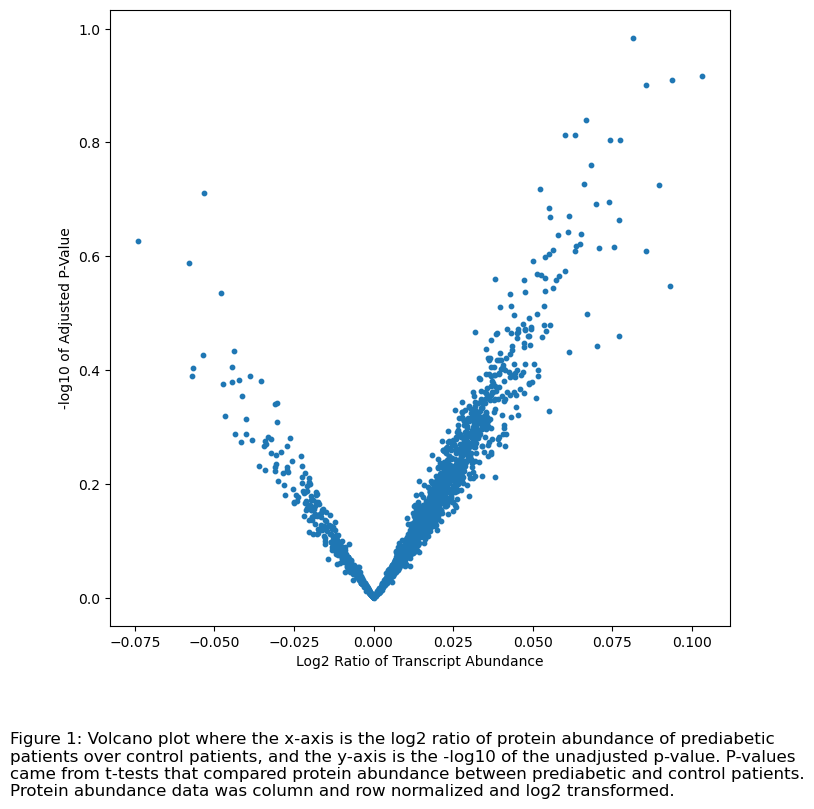

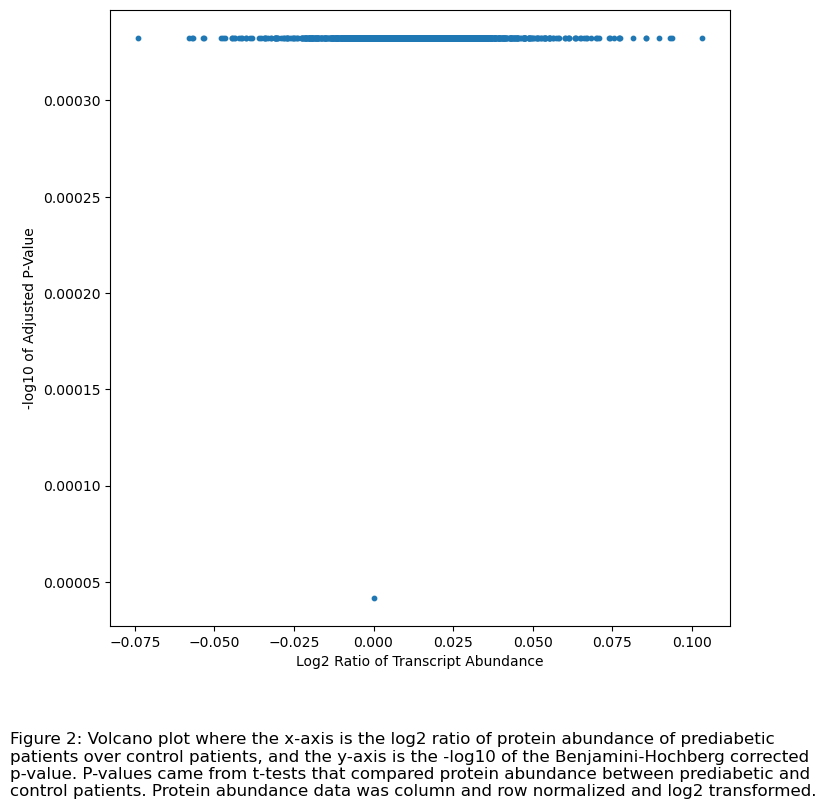

In [218]:
#volcano plot: PD vs CTRL
log2_ratio_pd_ctrl = row_means_pd_df['Samples_Mean'] - row_means_ctrl_df['Samples_Mean']

# Ensure the data is numeric
pd_df = pd_df.apply(pd.to_numeric, errors='coerce')
ctrl_df = ctrl_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pd_df = pd_df.dropna()
ctrl_df = ctrl_df.dropna()

# Perform a t-test for each gene
t_test_results = stats.ttest_ind(pd_df, ctrl_df, axis=1)

# Create a DataFrame with the p-values
p_values = pd.DataFrame({'p_value': t_test_results.pvalue}, index=log2_ratio_pd_ctrl.index)


# Perform multiple testing correction
p_values['adj_p_value'] = multipletests(p_values['p_value'], method='fdr_bh')[1]

#P-values less than 1e-300
p_values.loc[p_values['adj_p_value'] <= 1e-300, 'adj_p_value'] = 1e-300

# Create a DataFrame with the -log10 of the adjusted p-values
p_values['-log10_adj_p_value'] = -np.log10(p_values['adj_p_value'])
p_values['-log10_p_value'] = -np.log10(p_values['p_value'])

# Create a DataFrame with the log2 ratio and the -log10 of the adjusted p-values
volcano_df = pd.concat([log2_ratio_pd_ctrl, p_values], axis=1)

# Plot the volcano plot (unadjusted)
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 1: Volcano plot where the x-axis is the log2 ratio of protein abundance of prediabetic patients over control patients, and the y-axis is the -log10 of the unadjusted p-value. P-values came from t-tests that compared protein abundance between prediabetic and control patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()


# Plot the volcano plot
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_adj_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 2: Volcano plot where the x-axis is the log2 ratio of protein abundance of prediabetic patients over control patients, and the y-axis is the -log10 of the Benjamini-Hochberg corrected p-value. P-values came from t-tests that compared protein abundance between prediabetic and control patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()

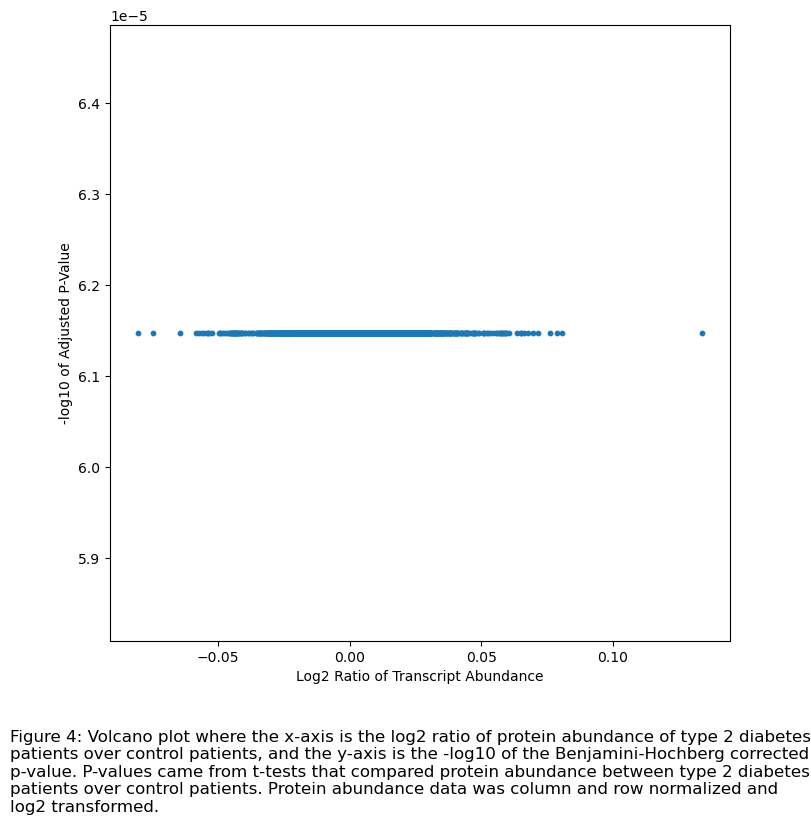

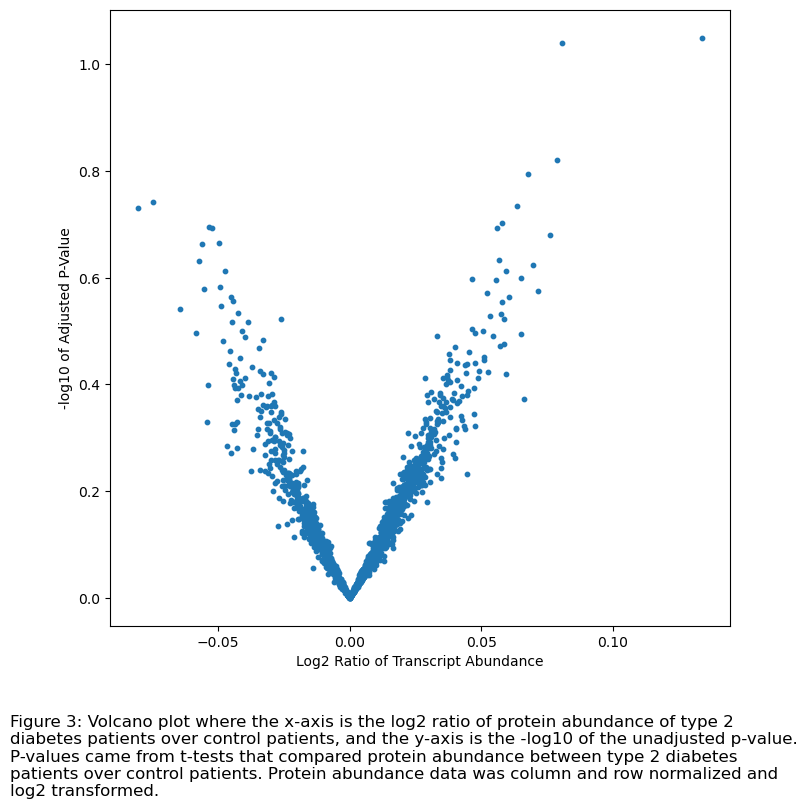

In [220]:
#volcano plot: T2D vs CTRL
log2_ratio_t2d_ctrl = row_means_t2d_df['Samples_Mean'] - row_means_ctrl_df['Samples_Mean']


# Ensure the data is numeric
t2d_df = t2d_df.apply(pd.to_numeric, errors='coerce')
ctrl_df = ctrl_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
t2d_df = t2d_df.dropna()
ctrl_df = ctrl_df.dropna()

# Perform a t-test for each gene
t_test_results = stats.ttest_ind(t2d_df, ctrl_df, axis=1)

# Create a DataFrame with the p-values
p_values = pd.DataFrame({'p_value': t_test_results.pvalue}, index=log2_ratio_t2d_ctrl.index)


# Perform multiple testing correction
p_values['adj_p_value'] = multipletests(p_values['p_value'], method='fdr_bh')[1]

#P-values less than 1e-300
p_values.loc[p_values['adj_p_value'] <= 1e-300, 'adj_p_value'] = 1e-300

# Create a DataFrame with the -log10 of the adjusted p-values
p_values['-log10_adj_p_value'] = -np.log10(p_values['adj_p_value'])
p_values['-log10_p_value'] = -np.log10(p_values['p_value'])

# Create a DataFrame with the log2 ratio and the -log10 of the adjusted p-values
volcano_df = pd.concat([log2_ratio_t2d_ctrl, p_values], axis=1)

# Plot the volcano plot
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_adj_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 4: Volcano plot where the x-axis is the log2 ratio of protein abundance of type 2 diabetes patients over control patients, and the y-axis is the -log10 of the Benjamini-Hochberg corrected p-value. P-values came from t-tests that compared protein abundance between type 2 diabetes patients over control patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()

# Plot the volcano plot
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 3: Volcano plot where the x-axis is the log2 ratio of protein abundance of type 2 diabetes patients over control patients, and the y-axis is the -log10 of the unadjusted p-value. P-values came from t-tests that compared protein abundance between type 2 diabetes patients over control patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()

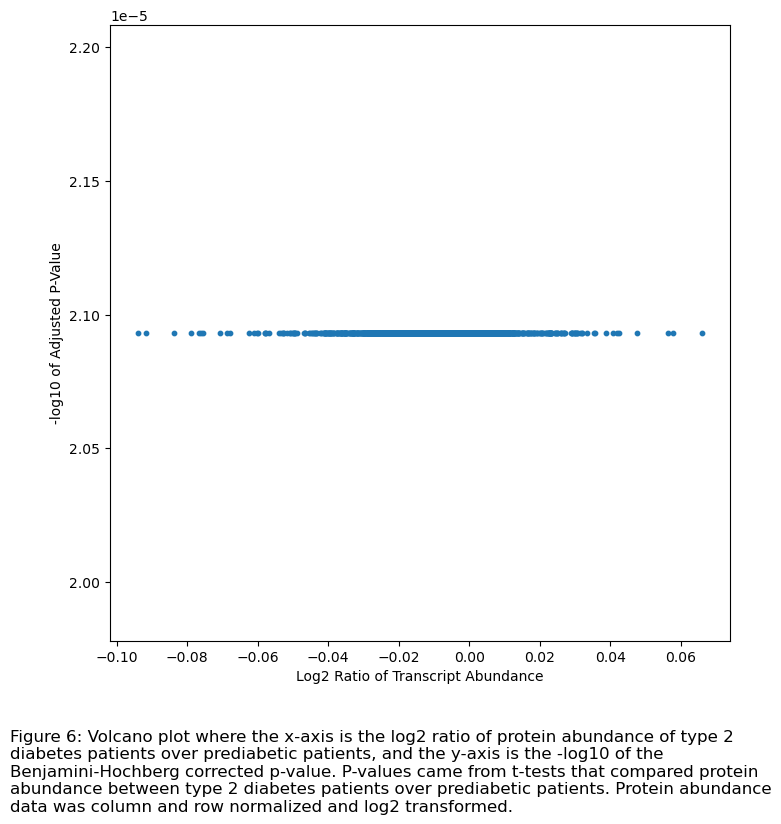

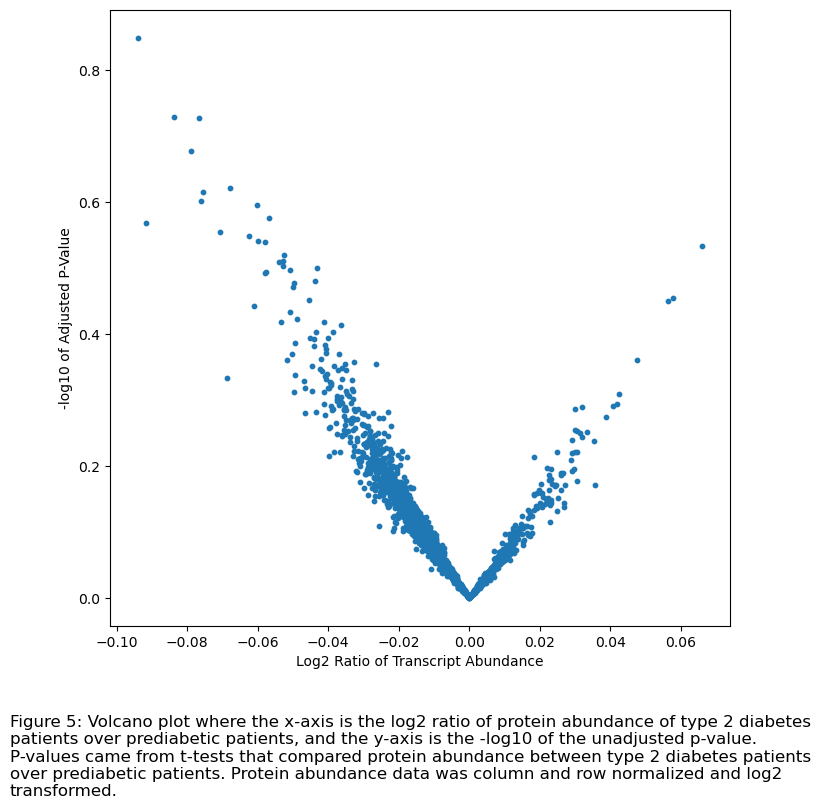

In [222]:
#Volcano Plot - t-test (T2D vs PD)

log2_ratio_t2d_pd = row_means_t2d_df['Samples_Mean'] - row_means_pd_df['Samples_Mean']


# Ensure the data is numeric
t2d_df = t2d_df.apply(pd.to_numeric, errors='coerce')
pd_df = pd_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
t2d_df = t2d_df.dropna()
pd_df = pd_df.dropna()

# Perform a t-test for each gene
t_test_results = stats.ttest_ind(t2d_df, pd_df, axis=1)

# Create a DataFrame with the p-values
p_values = pd.DataFrame({'p_value': t_test_results.pvalue}, index=log2_ratio_t2d_pd.index)


# Perform multiple testing correction
p_values['adj_p_value'] = multipletests(p_values['p_value'], method='fdr_bh')[1]

#P-values less than 1e-300
p_values.loc[p_values['adj_p_value'] <= 1e-300, 'adj_p_value'] = 1e-300

# Create a DataFrame with the -log10 of the adjusted p-values
p_values['-log10_adj_p_value'] = -np.log10(p_values['adj_p_value'])
p_values['-log10_p_value'] = -np.log10(p_values['p_value'])

# Create a DataFrame with the log2 ratio and the -log10 of the adjusted p-values
volcano_df = pd.concat([log2_ratio_t2d_pd, p_values], axis=1)

# Plot the volcano plot
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_adj_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 6: Volcano plot where the x-axis is the log2 ratio of protein abundance of type 2 diabetes patients over prediabetic patients, and the y-axis is the -log10 of the Benjamini-Hochberg corrected p-value. P-values came from t-tests that compared protein abundance between type 2 diabetes patients over prediabetic patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()

# Plot the volcano plot
plt.figure(figsize=(8,8))
plt.scatter(volcano_df['Samples_Mean'], volcano_df['-log10_p_value'], s=10)
plt.xlabel('Log2 Ratio of Transcript Abundance')
plt.ylabel('-log10 of Adjusted P-Value')
caption = "Figure 5: Volcano plot where the x-axis is the log2 ratio of protein abundance of type 2 diabetes patients over prediabetic patients, and the y-axis is the -log10 of the unadjusted p-value. P-values came from t-tests that compared protein abundance between type 2 diabetes patients over prediabetic patients. Protein abundance data was column and row normalized and log2 transformed."
plt.figtext(x=0, y=-0.1, s=caption, wrap=True, horizontalalignment='left', fontsize=12, fontweight='normal')
plt.show()